---
title: Lecture 1
subtitle: Introduction to Course and Image Operations
date: 2024-08-22
downloads:
  - file: ../assets/01_lecture.pdf
    title: 01_lecture.pdf
  - file: 01_lecture.ipynb
    title: 01_lecture.ipynb
---

## OpenCV basics

### Import required libraries

In [1]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

:::{note}
CV and CV2 are the API versions (not reference to the version of OpenCV. CV is the original C code version, whereas CV2 is the C++ version.
:::

### Helper functions and assignments

In [163]:
def gray_plt(ax, img):
    '''
    helper function to create grayscale plots
    '''
    out = ax.imshow(img, cmap='gray', vmin=0, vmax=255)
    return out

figsize_1by1 = [6, 4.5]
figsize_2by2 = [8, 6]

### Loading an image

We'll load in an image of the Cathedral of Learning[^cathedral_credit].  The [imread](#card-imread) function is used to load an image.

[^cathedral_credit]: [Link](https://commons.wikimedia.org/wiki/File:CathedralFromSS.jpg), Credit: Michael G. White, Copyright: © 2007 Michael G. White

In [3]:
cathedral_image = cv2.imread(os.path.relpath('assets/Pitt_Cathedral.jpg'), cv2.IMREAD_COLOR)

:::{important}
OpenCV reads color images in as __BGR__ not RGB. To circumvent this see {ref}`changing-color-maps`.
:::

Since the image is a NumPy array, NumPy attributes such as `shape` and `dtype` can be used to obtain information about the image.

In [4]:
# print the size of the image
print("Image size (H, W, channels) is:", cathedral_image.shape)

# print the data-type of the image
print("Data type of the image is:", cathedral_image.dtype)

Image size (H, W, channels) is: (768, 1024, 3)
Data type of the image is: uint8


The `uint8` data type has a range from 0 to 255. For a refresher on image data types see this [scikit-image user guide article](https://scikit-image.org/docs/stable/user_guide/data_types.html). 

Matplotlib can be used to display the image. Specifically the function [imshow](#card-imshow).

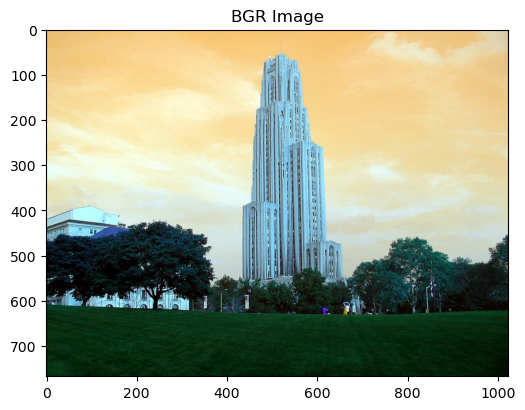

In [165]:
fig, ax = plt.subplots(figsize=figsize_1by1)
ax.imshow(cathedral_image)
ax.set_title("BGR Image")
plt.show()

### Changing color maps

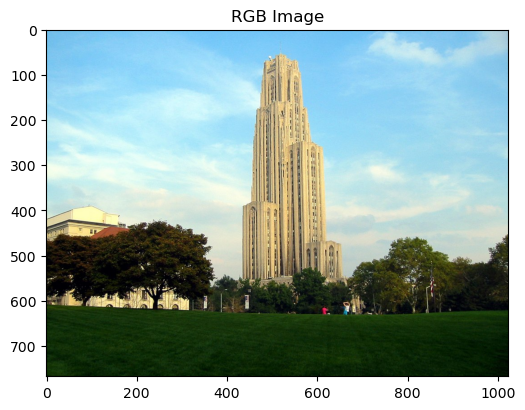

In [167]:
# We have to reverse the color order to get from BGR to RGB
cathedral_image_rgb = cathedral_image[:, :, ::-1]
fig, ax = plt.subplots(figsize=figsize_1by1)
ax.imshow(cathedral_image_rgb)
ax.set_title('RGB Image')
plt.show()

:::{tip}
OpenCV reads the image in as a 3D Numpy array. The slicing operation `[:, :, ::-1]` means take all the rows, take all the columns, and reverse the channels.
:::

#### Using cvtColor command

We can also use [cvtColor](#card-cvtColor) to convert the color scheme to various options. 

In [7]:
cathedral_image_rgb = cv2.cvtColor(cathedral_image, cv2.COLOR_BGR2RGB)

#### Color channels

Each pixel in an image is described by its row, height, and channel tuple. [split](#card-split) can be used to see each channel separately.

You can merge the three channels using the [merge](#card-merge) function.

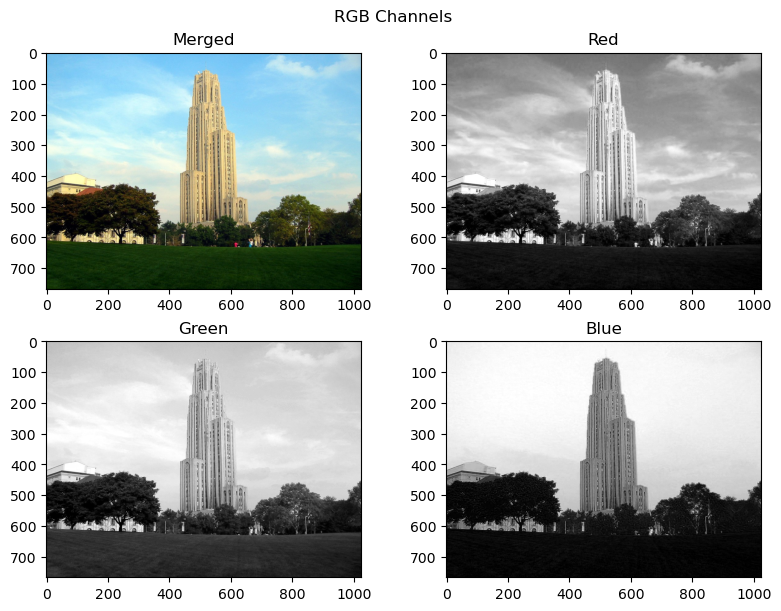

In [168]:
# split the image into B, G, R components
b, g, r = cv2.split(cathedral_image)

# merge the individual channels
img_merged = cv2.merge((r, g, b))

# show the results
fig, axs = plt.subplots(2, 2, figsize=figsize_2by2, layout='constrained')
fig.suptitle('RGB Channels')
axs[0,0].imshow(img_merged); axs[0,0].set_title('Merged')
gray_plt(axs[0,1], r); axs[0,1].set_title('Red')
gray_plt(axs[1,0], g); axs[1,0].set_title('Green')
gray_plt(axs[1,1], b); axs[1,1].set_title('Blue')
plt.show()

### HSV color scheme

[HSV](wiki:HSL_and_HSV) can be thought of as a radial space, whereas RGB is a cartisean space.

- Hue: The "angle". Imagine the colorwheel.
- Saturation: The "radius". THe center will be white and the edge the deepest of that color.
- Value: The "height". 0 is black/darker version of that color

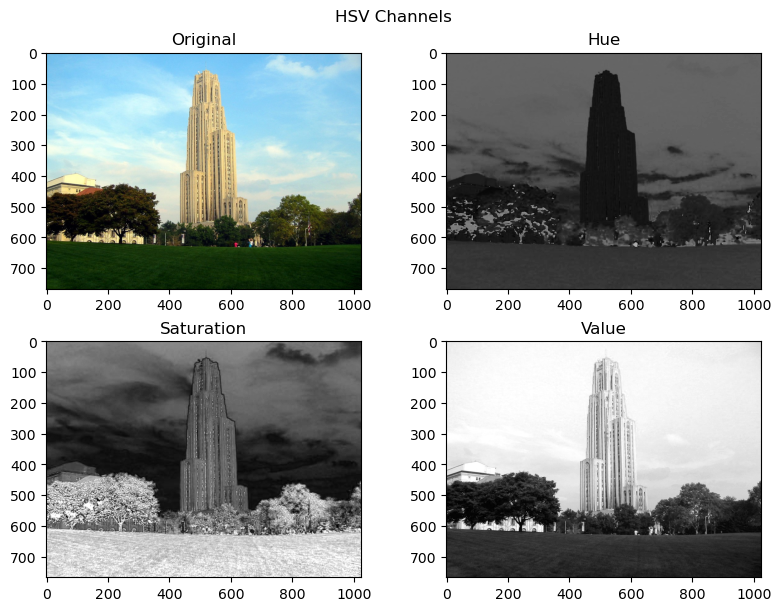

In [169]:
img_hsv = cv2.cvtColor(cathedral_image, cv2.COLOR_BGR2HSV)

# split the image into the h, s, and v components
h, s, v = cv2.split(img_hsv)

# Show the results
fig, axs = plt.subplots(2, 2, figsize=figsize_2by2, layout='constrained')
fig.suptitle('HSV Channels')
axs[0,0].imshow(cathedral_image_rgb); axs[0,0].set_title('Original')
gray_plt(axs[0,1], h); axs[0,1].set_title('Hue')
gray_plt(axs[1,0], s); axs[1,0].set_title('Saturation')
gray_plt(axs[1,1], v); axs[1,1].set_title('Value')
plt.show()

We can edit the values. 

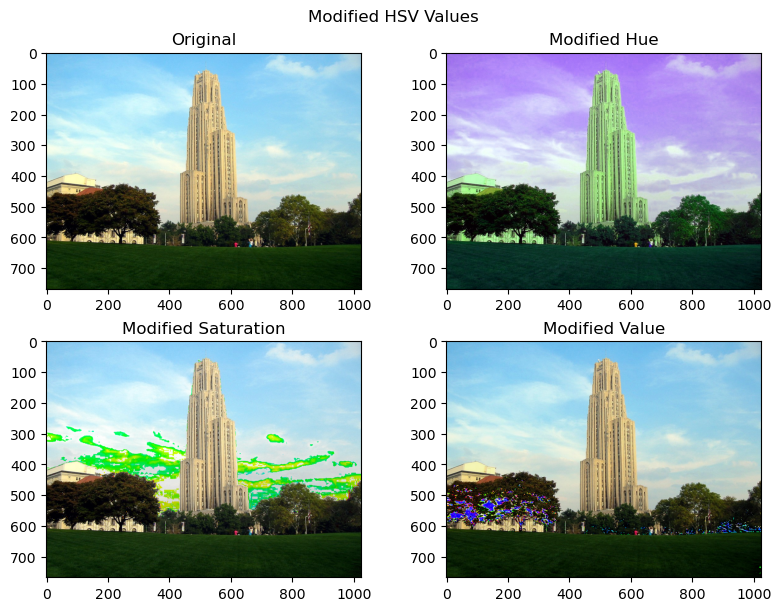

In [170]:
# set the new hue values
h_new = h + 30
mod_merged_hsv = cv2.merge((h_new, s, v))
mod_rgb = cv2.cvtColor(mod_merged_hsv, cv2.COLOR_HSV2RGB)

# set the new saturation values
s_new = s - 20
mod_merged_hsv2 = cv2.merge((h, s_new, v))
mod_rgb2 = cv2.cvtColor(mod_merged_hsv2, cv2.COLOR_HSV2RGB)

# set the new value values
v_new = v - 10
mod_merged_hsv3 = cv2.merge((h, s, v_new))
mod_rgb3 = cv2.cvtColor(mod_merged_hsv3, cv2.COLOR_HSV2RGB)

# show the images
fig, axs = plt.subplots(2, 2, figsize=figsize_2by2, layout='constrained')
fig.suptitle('Modified HSV Values')
axs[0,0].imshow(cathedral_image_rgb); axs[0,0].set_title('Original')
axs[0,1].imshow(mod_rgb); axs[0,1].set_title('Modified Hue')
axs[1,0].imshow(mod_rgb2); axs[1,0].set_title('Modified Saturation')
axs[1,1].imshow(mod_rgb3); axs[1,1].set_title('Modified Value')
plt.show()

:::{note}
The saturation and value is showing [clipping](wiki:Clipping_(photography)).
:::

### Saving files

Use [imwrite](#card-imwrite) to write the image to disk.

In [13]:
# save the image
cv2.imwrite("cathedral_image_(RGB).png", cathedral_image_rgb);

You can remove files via the following if you don't like clutter:

In [14]:
os.remove("cathedral_image_(RGB).png")

## Basic image manipulations

In [109]:
# Read image as gray scale
cb_img = cv2.imread(os.path.relpath('assets/checkerboard_18x18.png'), cv2.IMREAD_GRAYSCALE)

# Show the underlying data
print(cb_img)

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

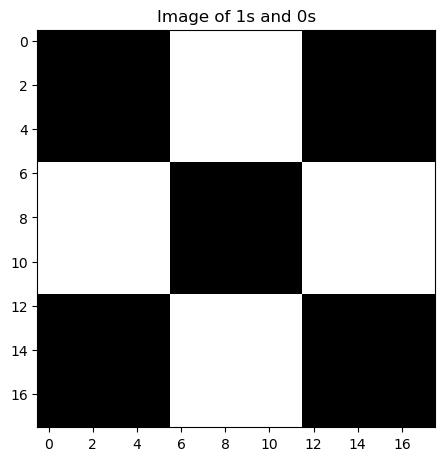

In [171]:
# Render the image
fig, ax = plt.subplots(figsize=figsize_1by1, layout='constrained')
gray_plt(ax, cb_img); ax.set_title('Image of 1s and 0s')
plt.show()

:::{warning}
When using `imshow` with non-RGB(A) images, Matplotlib defaults to `cmap=viridis` which applies a pseudo-color map. Therefore, __either convert the image to RGB(A) or apply a gray color map as shown above__.
:::

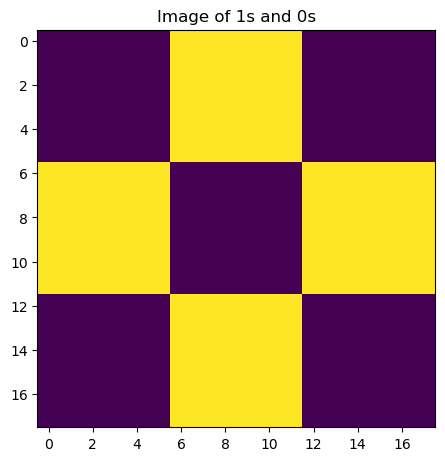

In [172]:
# binary image that is displayed as color because of imshow's default settings
fig, ax = plt.subplots(figsize=figsize_1by1, layout='constrained')
ax.imshow(cb_img); ax.set_title('Image of 1s and 0s')
plt.show()

### Manipulating image pixels

You can modify the intensity values of pixels by using NumPy operations to assign a new value to the pixel.

:::{tip}
It's a good idea to perform operations on a copy of the array since these operations modify the array in place.
:::

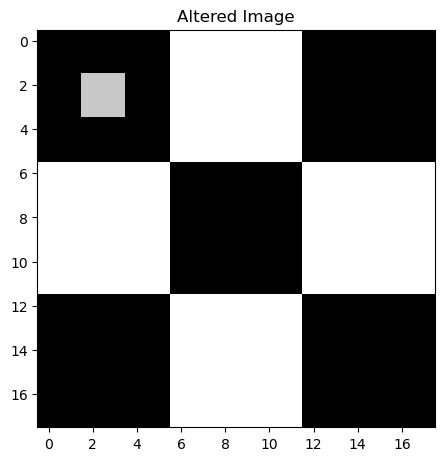

In [173]:
# copy the image
cb_img_copy = cb_img.copy()

# Take the pixels from the second and third rows and the second and third columns
cb_img_copy[2:4, 2:4] = 200

# Show the image
fig, ax = plt.subplots(figsize=figsize_1by1, layout='constrained')
gray_plt(ax, cb_img_copy); ax.set_title('Altered Image')
plt.show()

### Cropping images

Cropping an image is achieved by simply selecting a group of pixels.

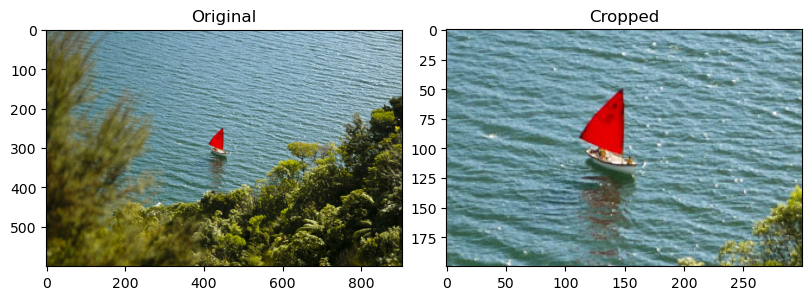

In [174]:
# Read in the image and convert to RGB
img_NZ_bgr = cv2.imread(os.path.relpath('assets/New_Zealand_Boat.jpg'), cv2.IMREAD_COLOR)
img_NZ_rgb = cv2.cvtColor(img_NZ_bgr, cv2.COLOR_BGR2RGB)

# crop the image
cropped_img = img_NZ_rgb[200:400, 300:600]

# show the images
fig, ax = plt.subplots(1, 2, figsize=figsize_2by2, layout='constrained')
ax[0].imshow(img_NZ_rgb); ax[0].set_title('Original')
ax[1].imshow(cropped_img); ax[1].set_title('Cropped')
plt.show()

### Resizing images

The function [resize](#card-resize) resizes the image `src` down to or up to the specified size. The size and type are derived from the `src`, `dsize`, `fx`, and `fy`.

#### Specifying exact size of the output image

Suppose we wanted to [downsample](wiki:Downsampling_(signal_processing)) the original image by specifying the output size.

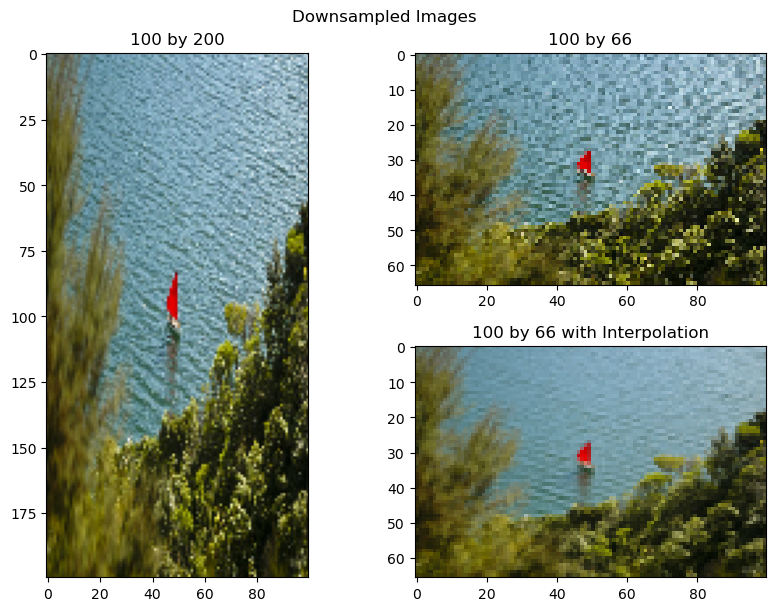

In [190]:
'''
Specify exact size of output image
'''
# specify a tuple of width by height
dim = (100, 200)

# resize the image
resized_img = cv2.resize(img_NZ_rgb, dsize=dim)

'''
Specify width and maintain aspect ratio
'''
# specify a desired width and get the original size
d_width = 100
height, width = img_NZ_rgb.shape[:2] # remember second element is color vector

# calculate the aspect ratio and the new height
ar = height / width
d_height = int(ar * d_width)
d_dim = (d_width, d_height)

# resize the image
resized_img_ar = cv2.resize(img_NZ_rgb, dsize=d_dim)
# better results with this interpolation value
resized_img_ar_inter = cv2.resize(img_NZ_rgb, dsize=d_dim, interpolation=cv2.INTER_AREA)

# show the images
fig = plt.figure(figsize=figsize_2by2, layout='constrained')
fig.suptitle('Downsampled Images')
axd = fig.subplot_mosaic([['A', 'B'],['A', 'C']])
axd['A'].imshow(resized_img); axd['A'].set_title(f'{dim[0]} by {dim[1]}')
axd['B'].imshow(resized_img_ar); axd['B'].set_title(f'{d_dim[0]} by {d_dim[1]}')
axd['C'].imshow(resized_img_ar_inter)
axd['C'].set_title(f'{d_dim[0]} by {d_dim[1]} with Interpolation')
plt.show()

#### Specifying scaling factor using fx and fy

Suppose we wanted to [upsample](wiki:Upsampling) the image by using a scaling factor.

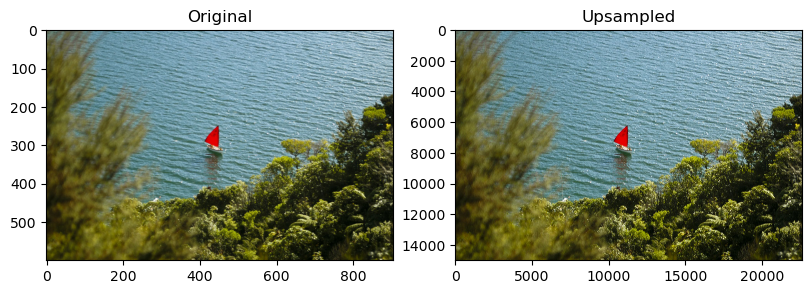

In [198]:
# resize the image
upsampled_img = cv2.resize(img_NZ_rgb, None, fx=25, fy=25, interpolation=cv2.INTER_CUBIC)

# show the image
fig, axs = plt.subplots(1, 2, figsize=figsize_2by2, layout='constrained')
axs[0].imshow(img_NZ_rgb); axs[0].set_title('Original')
axs[1].imshow(upsampled_img); axs[1].set_title('Upsampled')
plt.show()

### Flipping images

The [flip](#card-flip) function is used to flip images.

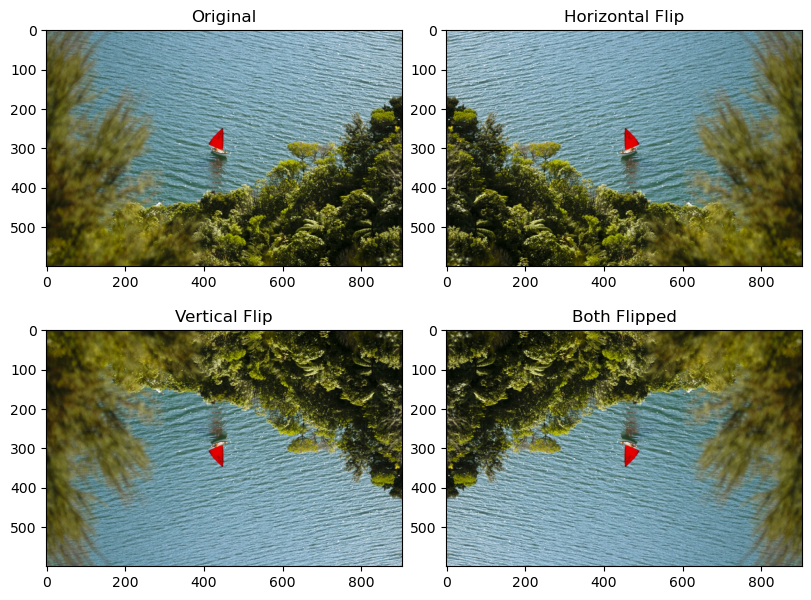

In [201]:
# flip the images
img_NZ_rgb_flipped_horz = cv2.flip(img_NZ_rgb, 1)
img_NZ_rgb_flipped_vert = cv2.flip(img_NZ_rgb, 0)
img_NZ_rgb_flipped_both = cv2.flip(img_NZ_rgb, -1)

# show the images
fig, axs = plt.subplots(2, 2, figsize=figsize_2by2, layout='constrained')
axs[0,0].imshow(img_NZ_rgb); axs[0,0].set_title('Original')
axs[0,1].imshow(img_NZ_rgb_flipped_horz);axs[0,1].set_title("Horizontal Flip")
axs[1,0].imshow(img_NZ_rgb_flipped_vert);axs[1,0].set_title("Vertical Flip")
axs[1,1].imshow(img_NZ_rgb_flipped_both);axs[1,1].set_title("Both Flipped")
plt.show()

## Annotating images

Annotations are useful for marking up your results from presentations or demos. They can also be useful during development and debugging.
- Drawing lines can be accomplished using the [line](#card-line) function.
- Drawing lines can be accomplished using the [circle](#card-circle) function.
- Drawing rectangles can be accomplished using the [rectangle](#card-rectangle) function.
- Adding text can be accomplished using the [putText](#card-putText) function.

:::{important}
Annotations modify the data in place.
:::

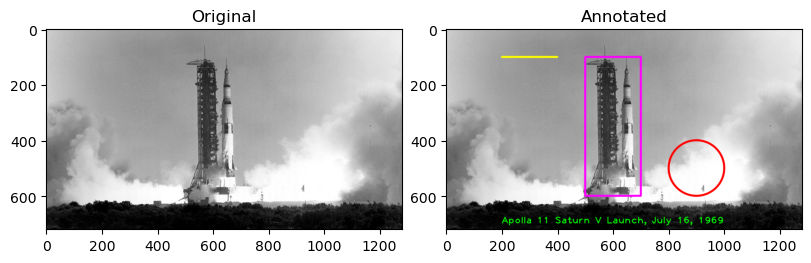

In [219]:
# Read in an image
img = cv2.imread(os.path.relpath('assets/Apollo_11_launch.jpg'), cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Create copies
img_copy = img_rgb.copy()

# global parameters
g_thickness = 5
g_lineType = cv2.LINE_AA

# line parameters
line_start = (200, 100)
line_stop = (400, 100)
line_color = (255, 255, 0) # yellow

# circle parameters
circle_center = (900, 500)
circle_radius = 100
circle_color = (255, 0, 0) # red

# rectangle parameters
rect_vertex_1 = (500, 100)
rect_vertex_2 = (700, 600)
rect_color = (255, 0, 255) # purple

# text parameters
text = "Apolla 11 Saturn V Launch, July 16, 1969"
text_scale = 2.3
text_face = cv2.FONT_HERSHEY_PLAIN
text_color = (0, 255, 0) # green
text_thickness = 2
text_origin = (200, 700) # origin is the bottom left corner of the text string

# apply the annotations
cv2.line(img_copy, line_start, line_stop, line_color, thickness=g_thickness, lineType=g_lineType)
cv2.circle(img_copy, circle_center, circle_radius, circle_color, thickness=g_thickness, lineType=g_lineType)
cv2.rectangle(img_copy, top_left_vertex, bottom_right_vertex, purple, thickness=g_thickness, lineType=g_lineType)
cv2.putText(img_copy, text, text_origin, text_face, text_scale, text_color, thickness=text_thickness, lineType=g_lineType)

# show the image
fig, ax = plt.subplots(1, 2, figsize=figsize_2by2, layout='constrained')
ax[0].imshow(img_rgb); ax[0].set_title('Original')
ax[1].imshow(img_copy); ax[1].set_title('Annotated')
plt.show()

## Basic image enhancement using mathematical operations

Image processing techniques take advantage of mathematical operations to achieve different results. Most often we arrive at an enhanced version of the image using some basic operations. We will take a look at some of the fundamental operations used in computer vision pipelines.

:::{note}
Arrays must be the same size and data type.
:::

### Addition or brightness

Addition of images results in increasing or decreasing the brightness of the image since we are essentially increasing or decreasing the intensity value of each pixel by the same amount. We can increase the brightness by using the [add](#card-add) function, and we can decrease the brightness using the [subtract](#card-subtract) function.

In [225]:
# read in the image and convert to RGB
img = cv2.imread(os.path.relpath('assets/New_Zealand_Coast.jpg'), cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# get info on the image array
height, width, _ = img_rgb.shape
img_type = img_rgb.dtype

# print the size and type
print(f'The image is {width} pixels wide by {height} pixels high and is type {img_type}.')

The image is 840 pixels wide by 600 pixels high and is type uint8.


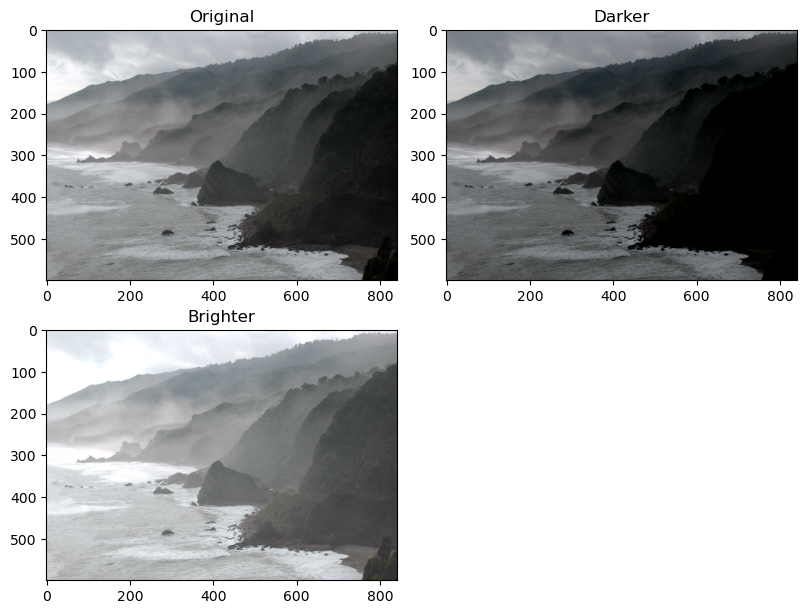

In [232]:
# create an array with elements of a constant value
shift_array = np.ones(img_rgb.shape, dtype="uint8") * 50

# apply the array to the oringal image
img_darker = cv2.subtract(img_rgb, shift_array)
img_brighter = cv2.add(img_rgb, shift_array)

# show the images
fig, axs = plt.subplots(2, 2, figsize=figsize_2by2, layout='constrained')
axs[0,0].imshow(img_rgb); axs[0,0].set_title('Original')
axs[0,1].imshow(img_darker); axs[0,1].set_title('Darker')
axs[1,0].imshow(img_brighter); axs[1,0].set_title('Brighter')
axs[1,1].axis('off') # hide the empty axes
plt.show()

### Multiplication or contrast

Contrast is the difference in intensity values of the pixels of an image. Multiplying the intensity values with a constant can make the difference larger or smaller. We can use the [multiply](#card-multiply) function to accomplish this.

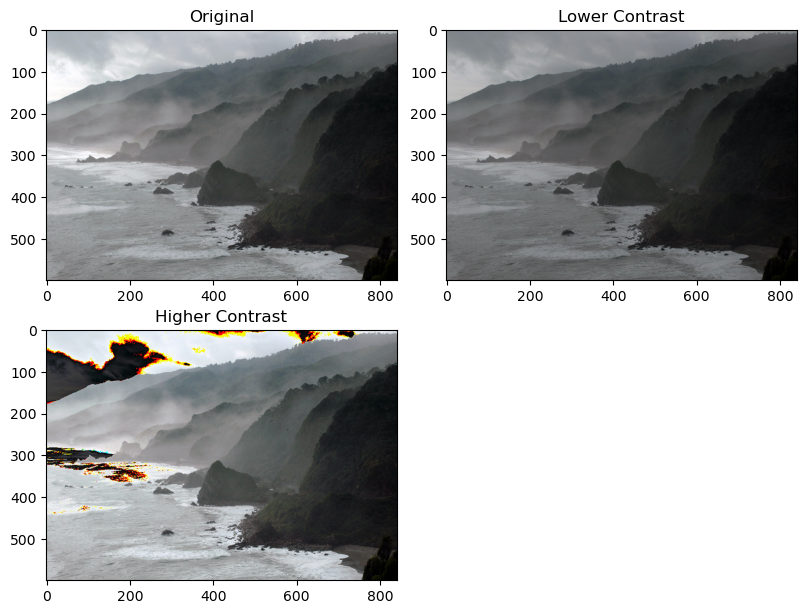

In [237]:
# note that the matrices are of type float64
low_contrast_array = np.ones(img_rgb.shape) * 0.75
high_contrast_array = np.ones(img_rgb.shape) * 1.25

# convert data type, perform multiplication, convert back to original data type
img_low_contrast = np.uint8(cv2.multiply(np.float64(img_rgb), low_contrast_array))
img_high_contrast = np.uint8(cv2.multiply(np.float64(img_rgb), high_contrast_array))

# show the images
fig, axs = plt.subplots(2, 2, figsize=figsize_2by2, layout='constrained')
axs[0,0].imshow(img_rgb); axs[0,0].set_title('Original')
axs[0,1].imshow(img_low_contrast); axs[0,1].set_title('Lower Contrast')
axs[1,0].imshow(img_high_contrast); axs[1,0].set_title('Higher Contrast')
axs[1,1].axis('off') # hide the empty axes
plt.show()

:::{note}
The odd colors in the high contrast image are a result of intensity values being greater than 255. Thus, the overflow issue.
:::

#### Handling overflow

The NumPy function [clip](#card-clip) can be used to handle overflow. It works by limiting the values to the specified range.

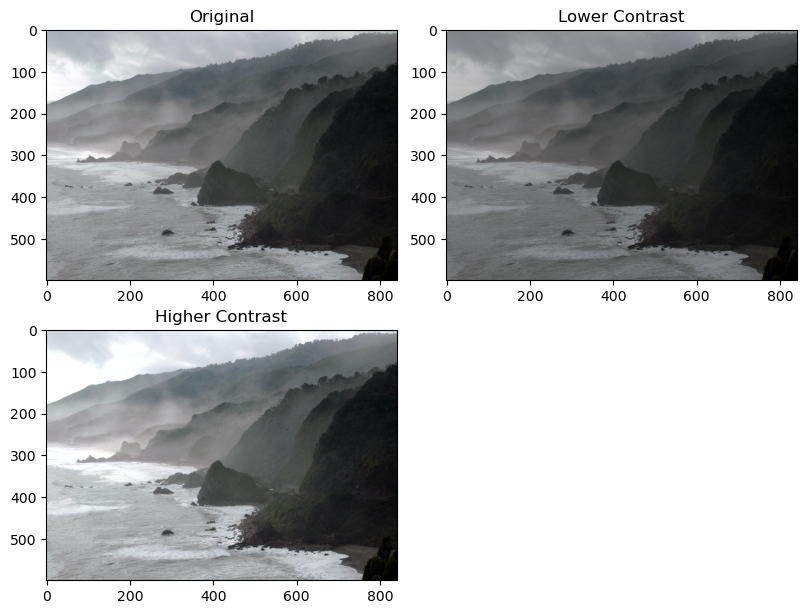

In [239]:
# limit values to a range of 0 to and including 255
img_high_contrast = np.uint8(np.clip(cv2.multiply(np.float64(img_rgb), matrix_high_contrast), 0, 255))

# show the images
fig, axs = plt.subplots(2, 2, figsize=figsize_2by2, layout='constrained')
axs[0,0].imshow(img_rgb); axs[0,0].set_title('Original')
axs[0,1].imshow(img_low_contrast); axs[0,1].set_title('Lower Contrast')
axs[1,0].imshow(img_high_contrast); axs[1,0].set_title('Higher Contrast')
axs[1,1].axis('off') # hide the empty axes
plt.show()

## Image thresholding

[Binary images](wiki:Binary_image) have a lot of use cases in image processing. One of the most common cases is creating [masks](wiki:Mask_(computing)). Masks allow us to process on specific parts of an image keeping the other parts intact.

[Image thresholding](wiki:Thresholding_(image_processing)) is used to create binary images from grayscale images. You can use different thresholds to create different binary images from the same original image. 

The [threshold](#card-threshold) function can be used to set a __global__ threshold to an image; whereas the [adaptiveThreshold](#card-adaptiveThreshold) function can be used to set a __local__ threshold on an image.

### Example

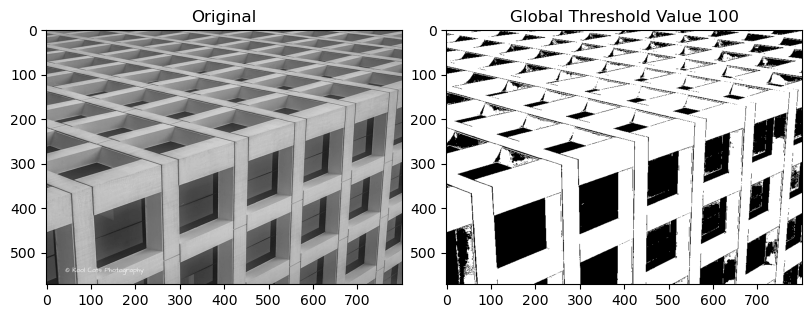

In [249]:
img = cv2.imread(os.path.relpath('assets/building-windows.jpg'), cv2.IMREAD_GRAYSCALE)
retval, img_thresh = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)

# show the images
fig, axs = plt.subplots(1, 2, figsize=figsize_2by2, layout='constrained')
gray_plt(axs[0], img); axs[0].set_title('Original')
gray_plt(axs[1], img_thresh); axs[1].set_title(f'Global Threshold Value {retval:.0f}')
plt.show()

### Application: sheet music reader

Suppose you wanted to build an application that could read sheet music. This is similar to OCR for text documents where the goal is to recognize text characters. In either application, one of the first steps in the processing pipeline is to isolate the important information in the image of a document (separating it from the background). This task can be accomplished with thresholding techniques. Let's take a look at an example.

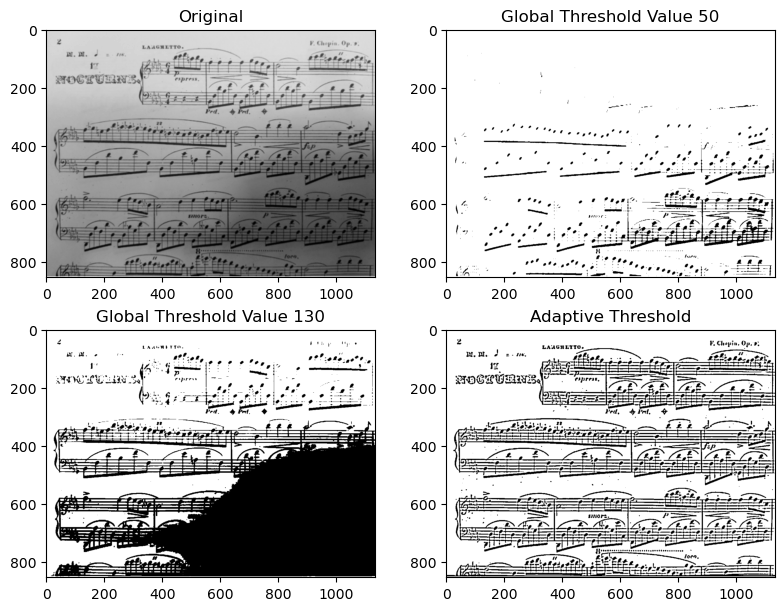

In [253]:
# read the original image
img = cv2.imread(os.path.relpath('assets/Piano_Sheet_Music.png'), cv2.IMREAD_GRAYSCALE)

# perform global thresholding
retval_50, img_thresh_50 = cv2.threshold(img_read, 50, 255, cv2.THRESH_BINARY)
retval_130, img_thresh_130 = cv2.threshold(img_read, 130, 255, cv2.THRESH_BINARY)

# perform adaptive thresholding
img_thresh_adp = cv2.adaptiveThreshold(img_read, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 7)

# show the images
fig, axs = plt.subplots(2, 2, figsize=figsize_2by2, layout='constrained')
gray_plt(axs[0,0], img); axs[0,0].set_title('Original')
gray_plt(axs[0,1], img_thresh_50); axs[0,1].set_title(f'Global Threshold Value {retval_50:.0f}')
gray_plt(axs[1,0], img_thresh_130); axs[1,0].set_title(f'Global Threshold Value {retval_130:.0f}')
gray_plt(axs[1,1], img_thresh_adp); axs[1,1].set_title('Adaptive Threshold')
plt.show()

## Bitwise operations

Bitwise operations can be performed where `True` values yield white pixels and `False` values yield black pixels. The following bitwise operations are available:

- [bitwise_and](#card-bitwise_and)
- [bitwise_or](#card-bitwise_or)
- [bitwise_xor](#card-bitwise_xor)
- [bitwise_not](#card-bitwise_not)

### Examples

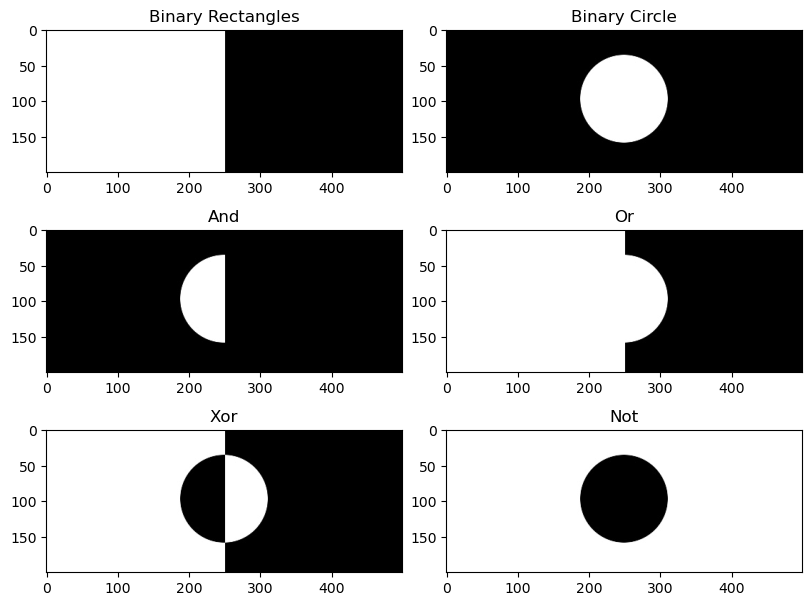

In [260]:
# read in the images
img_rec = cv2.imread(os.path.relpath('assets/rectangle.jpg'), cv2.IMREAD_GRAYSCALE)
img_cir = cv2.imread(os.path.relpath('assets/circle.jpg'), cv2.IMREAD_GRAYSCALE)

# bitwise operators
and_result = cv2.bitwise_and(img_rec, img_cir, mask=None)
or_result = cv2.bitwise_or(img_rec, img_cir, mask=None)
xor_result = cv2.bitwise_xor(img_rec, img_cir, mask=None)
not_result = cv2.bitwise_not(img_cir, mask=None)

# show the images
fig, axs = plt.subplots(3, 2, figsize=figsize_2by2, layout='constrained')
gray_plt(axs[0,0], img_rec); axs[0,0].set_title('Binary Rectangles')
gray_plt(axs[0,1], img_cir); axs[0,1].set_title('Binary Circle')
gray_plt(axs[1,0], and_result); axs[1,0].set_title('And')
gray_plt(axs[1,1], or_result); axs[1,1].set_title('Or')
gray_plt(axs[2,0], xor_result); axs[2,0].set_title('Xor')
gray_plt(axs[2,1], not_result); axs[2,1].set_title('Not')
plt.show()

## Application: logo manipulation

In this section we will show you how to fill in the white lettering of the Coca-Cola logo below with a background image.

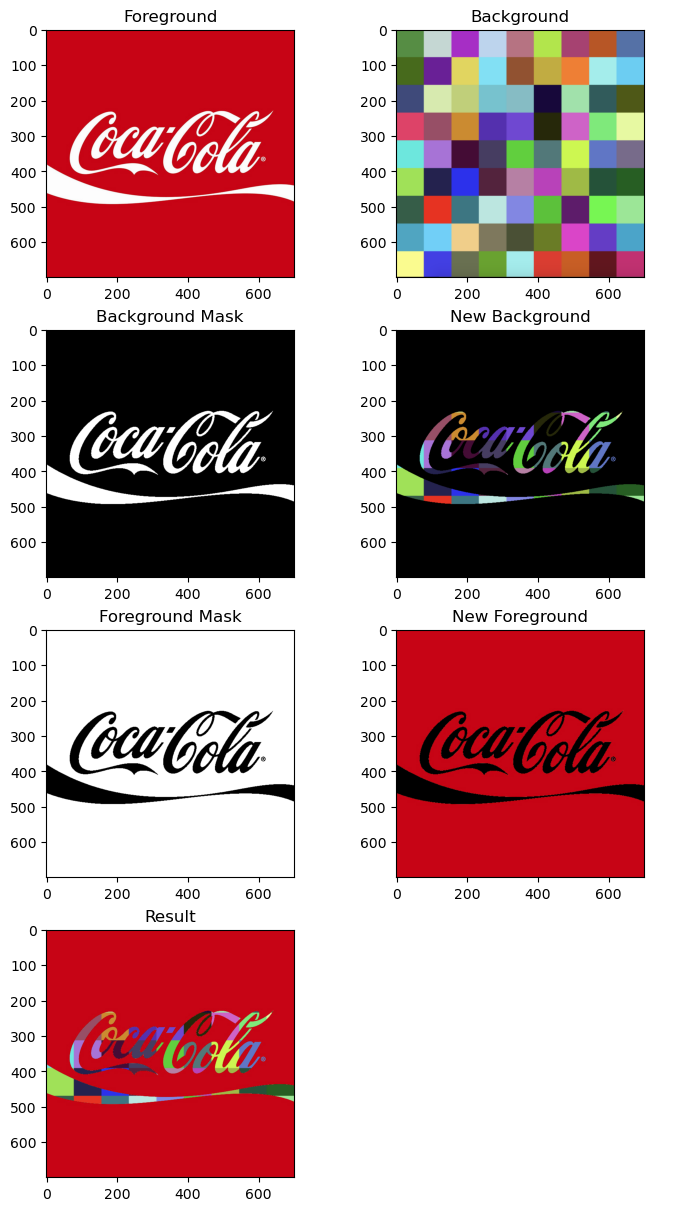

In [288]:
'''
Read foreground image
'''
# read in the foreground image and convert to RGB
img_foreground = cv2.imread(os.path.relpath('assets/coca-cola-logo.png'))
foreground_rgb = cv2.cvtColor(img_foreground, cv2.COLOR_BGR2RGB)

# store the logo height and width
foreground_height, foreground_width, _ = foreground_rgb.shape

'''
Read background image
'''
# read in the background image and convert to RGB
img_background = cv2.imread(os.path.relpath('assets/checkerboard_color.png'))
background_rgb = cv2.cvtColor(img_background, cv2.COLOR_BGR2RGB)

# resize the background image to match the foreground image
background_rgb = cv2.resize(background_rgb, (foreground_width, foreground_height), interpolation=cv2.INTER_AREA)

'''
Create mask for original image
'''
# convert the foreground to grayscale
foreground_gray = cv2.cvtColor(foreground_rgb, cv2.COLOR_RGB2GRAY)

# apply global threshold to create mask
retval, img_mask = cv2.threshold(foreground_gray, 127, 255, cv2.THRESH_BINARY)

'''
Apply background on the mask
'''
img_background_new = cv2.bitwise_and(background_rgb, background_rgb, mask=img_mask)

'''
Isolate foreground from the image
'''
img_mask_inv = cv2.bitwise_not(img_mask)
img_foreground_new = cv2.bitwise_and(foreground_rgb, foreground_rgb, mask=img_mask_inv)

'''
Merge results and display
'''
result = cv2.add(img_background_new, img_foreground_new)

# show the images
fig, axs = plt.subplots(4, 2, figsize=(7,12), layout='constrained')
axs[0,0].imshow(foreground_rgb); axs[0,0].set_title('Foreground')
axs[0,1].imshow(background_rgb); axs[0,1].set_title('Background')
gray_plt(axs[1,0], img_mask); axs[1,0].set_title('Background Mask')
axs[1,1].imshow(img_background_new); axs[1,1].set_title('New Background')
gray_plt(axs[2,0], img_mask_inv); axs[2,0].set_title('Foreground Mask')
axs[2,1].imshow(img_foreground_new); axs[2,1].set_title('New Foreground')
axs[3,0].imshow(result); axs[3,0].set_title('Result')
axs[3,1].axis('off')
plt.show()